In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import os
print(os.listdir(".."))
print(os.listdir("../input"))

import pandas as pd
import numpy as np
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
import os
from glob import glob
from PIL import Image
import matplotlib.pyplot as plt
from keras import optimizers
from keras.models import Sequential
from keras.layers import Dense,Activation,AveragePooling2D,MaxPooling2D,Dropout,BatchNormalization


['src', 'working', 'input', 'lib']
['dataset', 'rsna-bone-age']


Using TensorFlow backend.


In [2]:

# 2. upload file

# 1) <test>
import pandas as pd
datadf=pd.read_csv("../input/dataset/boneage-training-dataset3.csv",dtype=str)
# test['Sex'] = test['Sex'].map( {'TRUE':0, 'FALSE':1} )
datadf.head()
#img = load_img("../input/rsna-bone-age/boneage-training-dataset/boneage-training-dataset/1377.png")
#plt.imshow(img)

,Unnamed: 0,boneage,male,id
0,1377,180,FALSE,1377.png
1,1378,12,FALSE,1378.png
2,1379,94,FALSE,1379.png
3,1380,120,TRUE,1380.png
4,1381,82,FALSE,1381.png


In [3]:

# 3. image data generator
# 1) <img_gen>
img_gen=ImageDataGenerator(rescale=1./255) #data 전처리를 쉽게 할 수 있다.
all_generator=img_gen.flow_from_dataframe(datadf, directory="../input/rsna-bone-age/boneage-training-dataset/boneage-training-dataset", x_col='id', y_col='male', target_size=(80, 80), color_mode='grayscale', classes=None, class_mode='binary',shuffle=True, seed=None, save_to_dir=None, save_prefix='', save_format='png', subset='training', interpolation='nearest', drop_duplicates=True)


Found 12611 images belonging to 2 classes.


In [4]:

# 4. train, dev, test set 만들기
from sklearn.model_selection import train_test_split
train_df, validate_df = train_test_split(datadf, test_size=0.10, random_state=42)
train_df, test_df = train_test_split(train_df, test_size=0.10, random_state=42)
train_df = train_df.reset_index(drop=True)
validate_df = validate_df.reset_index(drop=True)
test_df = validate_df.reset_index(drop=True)

In [5]:

# 5. image data generator
# 1) train
train_datagen = ImageDataGenerator(rescale=1./255,)
train_generator = train_datagen.flow_from_dataframe(
    train_df, 
    directory="../input/rsna-bone-age/boneage-training-dataset/boneage-training-dataset", 
    x_col='id', 
    y_col='male', 
    target_size=(80, 80),
    class_mode='binary',
    shuffle=True, 
    seed=None, 
    save_to_dir=None, 
    save_prefix='', 
    save_format='png', 
    subset='training', 
    interpolation='nearest', 
    drop_duplicates=True)

Found 10214 images belonging to 2 classes.


In [6]:
# 2) dev set
validation_datagen = ImageDataGenerator(rescale=1./255)
validation_generator = validation_datagen.flow_from_dataframe(
    validate_df, 
    directory="../input/rsna-bone-age/boneage-training-dataset/boneage-training-dataset", 
    x_col='id', 
    y_col='male', 
    target_size=(80, 80),
    class_mode='binary',
    shuffle=True, 
    seed=None, 
    save_to_dir=None, 
    save_prefix='', 
    save_format='png', 
    subset='training', 
    interpolation='nearest', 
    drop_duplicates=True)

Found 1262 images belonging to 2 classes.


In [7]:
# 3) test set
test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = validation_datagen.flow_from_dataframe(
    test_df, 
    directory="../input/rsna-bone-age/boneage-training-dataset/boneage-training-dataset", 
    x_col='id', 
    y_col='male', 
    target_size=(80, 80),
    class_mode='binary',
    shuffle=True, 
    seed=None, 
    save_to_dir=None, 
    save_prefix='', 
    save_format='png', 
    subset='training', 
    interpolation='nearest', 
    drop_duplicates=True)


Found 1262 images belonging to 2 classes.


In [8]:

# 6. create model
model = Sequential()

model.add(Conv2D(3,(8,8),padding='same', input_shape=(80,80,3)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(AveragePooling2D(pool_size=(2,2),strides=(2,2)))

model.add(Conv2D(64,(5,5),padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))

model.add(Conv2D(128,(3,3),padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))

model.add(Flatten())

model.add(Dense(1024))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.6))

model.add(Dense(512))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.6))

model.add(Dense(128))
model.add(BatchNormalization())
model.add(Activation('relu'))
#model.add(Dropout(0.7))

#model.add(Activation('softmax'))

model.add(Dense(1,activation='sigmoid'))


Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [9]:
# 7. compile
#adam = optimizers.Adam(lr=0.02,beta_1=0.9,beta_2=0.999, epsilon = None, decay=0.0)
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])#여기까지가 학습 프로세스 설정
model.summary()


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 80, 80, 3)         579       
_________________________________________________________________
batch_normalization_1 (Batch (None, 80, 80, 3)         12        
_________________________________________________________________
activation_1 (Activation)    (None, 80, 80, 3)         0         
_________________________________________________________________
average_pooling2d_1 (Average (None, 40, 40, 3)         0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 40, 40, 64)        4864      
_________________________________________________________________
batch_normalization_2 (Batch (None, 40, 40, 64)        256       
_________________________________________________________________
activation_2 (Activation)    (None, 40, 40, 64)        0         
__________

In [10]:
# 8. train - 20 epochs
total_train_n=train_generator.n+validation_generator.n
total_train_size=train_generator.batch_size+validation_generator.batch_size
#history_0 = model.fit_generator(
 #   train_generator,  
 #  epochs=20, 
 # verbose=1,
 # validation_data=validation_generator,
#validation_steps=validation_generator.n//validation_generator.batch_size,
#    steps_per_epoch=total_train_n//total_train_size)

model.save('train14.h5')

In [11]:
# show graph


#plt.plot(history_0.history['acc'], 'b-', label="train set accuracy")
#plt.plot(history_0.history['val_acc'], 'r:', label="dev set accuracy")

In [12]:
# show test results(testset)
#scores = model.evaluate_generator(
#    test_generator,
#    steps = 20)
#print("%s: %.2f%%" %(model.metrics_names[1], scores[1]*100))

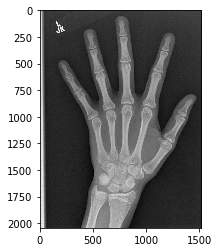

In [13]:
img = load_img("../input/rsna-bone-age/boneage-training-dataset/boneage-training-dataset/1377.png")
plt.imshow(img)

In [14]:
# 9. data augmentation
aug_datagen = ImageDataGenerator(
        rescale=1./255,
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range=10,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.1, # Randomly zoom image 
        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
        horizontal_flip=False,  # randomly flip images
        vertical_flip=False,
        fill_mode='nearest')  # randomly flip images


In [15]:
aug_generator = aug_datagen.flow_from_dataframe(
    train_df, 
    directory="../input/rsna-bone-age/boneage-training-dataset/boneage-training-dataset", 
    x_col='id', 
    y_col='male', 
    target_size=(80, 80),
    class_mode='binary',
    shuffle=True, 
    seed=None, 
    save_to_dir=None, 
    save_prefix='', 
    save_format='png', 
    subset='training', 
    interpolation='nearest', 
    drop_duplicates=True)

Found 10214 images belonging to 2 classes.


In [16]:
# 10. train with data augmentation
history_data_augmentation = model.fit_generator(
                              aug_generator,
                              epochs=50, 
                              verbose=1,
                              validation_data=validation_generator,
                              validation_steps=validation_generator.n//validation_generator.batch_size,
                              steps_per_epoch=total_train_n//total_train_size)

#model.save('with_aug.h5')

Instructions for updating:
Use tf.cast instead.
Epoch 1/50
179/179 [==============================] - 239s 1s/step - loss: 0.7494 - acc: 0.5007 - val_loss: 0.6999 - val_acc: 0.5385
Epoch 2/50
179/179 [==============================] - 216s 1s/step - loss: 0.7148 - acc: 0.5213 - val_loss: 0.6935 - val_acc: 0.5301
Epoch 3/50
179/179 [==============================] - 191s 1s/step - loss: 0.7084 - acc: 0.5110 - val_loss: 0.6917 - val_acc: 0.5699
Epoch 4/50
179/179 [==============================] - 190s 1s/step - loss: 0.7007 - acc: 0.5230 - val_loss: 0.6777 - val_acc: 0.5626
Epoch 5/50
179/179 [==============================] - 190s 1s/step - loss: 0.6941 - acc: 0.5379 - val_loss: 0.6890 - val_acc: 0.5398
Epoch 6/50
179/179 [==============================] - 190s 1s/step - loss: 0.6940 - acc: 0.5278 - val_loss: 0.6814 - val_acc: 0.5854
Epoch 7/50
179/179 [==============================] - 189s 1s/step - loss: 0.6936 - acc: 0.5288 - val_loss: 0.6835 - val_acc: 0.5520
Epoch 8/50
179/179 [=

In [17]:
# show graph


#plt.plot(history_data_augmentation.history['acc'], 'b-', label="train set accuracy")
#plt.plot(history_data_augmentation.history['val_acc'], 'r:', label="dev set accuracy")

In [18]:
# 11. train - 50 epochs with early stopping
total_train_n=train_generator.n+validation_generator.n
total_train_size=train_generator.batch_size+validation_generator.batch_size
history_1 = model.fit_generator(
    train_generator,  
    epochs=50, 
    verbose=1,
    validation_data=validation_generator,
    validation_steps=validation_generator.n//validation_generator.batch_size,
    steps_per_epoch=total_train_n//total_train_size
)

model.save('train_50_epochs_with_earlystopping.h5') # did not add early stopping by mistake

Epoch 1/50
179/179 [==============================] - 195s 1s/step - loss: 0.5291 - acc: 0.7360 - val_loss: 0.6483 - val_acc: 0.6455
Epoch 2/50
179/179 [==============================] - 184s 1s/step - loss: 0.5199 - acc: 0.7364 - val_loss: 0.5269 - val_acc: 0.7138
Epoch 3/50
179/179 [==============================] - 185s 1s/step - loss: 0.4995 - acc: 0.7502 - val_loss: 0.5191 - val_acc: 0.7276
Epoch 4/50
179/179 [==============================] - 184s 1s/step - loss: 0.4932 - acc: 0.7563 - val_loss: 0.5282 - val_acc: 0.7447
Epoch 5/50
179/179 [==============================] - 186s 1s/step - loss: 0.4778 - acc: 0.7601 - val_loss: 0.4810 - val_acc: 0.7528
Epoch 6/50
179/179 [==============================] - 184s 1s/step - loss: 0.4657 - acc: 0.7715 - val_loss: 0.5150 - val_acc: 0.7325
Epoch 7/50
179/179 [==============================] - 184s 1s/step - loss: 0.4625 - acc: 0.7792 - val_loss: 0.5135 - val_acc: 0.7325
Epoch 8/50
179/179 [==============================] - 183s 1s/step - 

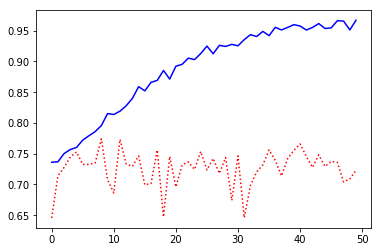

In [19]:
# show graph

plt.plot(history_1.history['acc'], 'b-', label="train set accuracy")
plt.plot(history_1.history['val_acc'], 'r:', label="dev set accuracy")

In [20]:
# show test results(testset)
scores = model.evaluate_generator(
    test_generator,
    steps = 20)
print("%s: %.2f%%" %(model.metrics_names[1], scores[1]*100))

acc: 70.94%
